<a href="https://colab.research.google.com/github/jakubros/NBA_players_value/blob/nba/NBA_players_value.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importy

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

## Wczytanie danych z pliku csv

In [ ]:
df = pd.read_csv('nba.csv', sep=';')

NameError: ignored

In [ ]:
df

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Salary_23-24
0,1,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,...,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1,4379527
1,2,Steven Adams,C,28,MEM,76,75,26.3,2.8,5.1,...,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9,12600000
2,3,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13.0,...,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1,32600060
3,4,Santi Aldama,PF,21,MEM,32,0,11.3,1.7,4.1,...,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1,2194200
4,5,Grayson Allen,SG,26,MIL,66,61,27.3,3.9,8.6,...,0.5,2.9,3.4,1.5,0.7,0.3,0.7,1.5,11.1,8500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,257,Ziaire Williams,SF,20,MEM,62,31,21.7,3.1,6.8,...,0.4,1.7,2.1,1.0,0.6,0.2,0.7,1.8,8.1,4810200
257,258,Delon Wright,SG,29,ATL,77,8,18.9,1.6,3.5,...,0.6,2.2,2.9,2.4,1.2,0.2,0.6,0.7,4.4,8195122
258,259,Thaddeus Young,PF,33,TOT,52,1,16.3,2.7,5.2,...,1.5,2.5,4.0,2.0,1.0,0.3,1.0,1.6,6.2,8000000
259,260,Trae Young,PG,23,ATL,76,76,34.9,9.4,20.3,...,0.7,3.1,3.7,9.7,0.9,0.1,4.0,1.7,28.4,40064220


In [ ]:
df.describe()

,Rk,Age,G,GS,MP,FG,FGA,3P,3PA,2P,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Salary_23-24
count,261.00000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,...,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,2.610000e+02
mean,131.00000,25.084291,56.574713,34.524904,24.509962,4.349808,9.359770,1.276628,3.608429,3.073946,...,1.065900,3.560153,4.627203,2.647126,0.777395,0.489272,1.401149,1.929119,11.853257,1.364750e+07
std,75.48841,4.063035,19.541651,28.110160,8.555209,2.401148,5.070248,0.935265,2.448109,2.035873,...,0.832758,1.962637,2.583213,2.118608,0.409674,0.430697,0.928377,0.704160,6.724053,1.245375e+07
min,1.00000,19.000000,2.000000,0.000000,3.000000,0.000000,0.500000,0.000000,0.000000,0.000000,...,0.000000,0.300000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.680320e+05
25%,66.00000,22.000000,48.000000,8.000000,18.200000,2.700000,5.600000,0.500000,1.700000,1.600000,...,0.500000,2.300000,2.900000,1.100000,0.500000,0.200000,0.800000,1.500000,7.400000,3.918480e+06
50%,131.00000,24.000000,62.000000,31.000000,26.000000,3.900000,8.300000,1.100000,3.500000,2.700000,...,0.800000,3.200000,4.100000,2.000000,0.700000,0.400000,1.100000,2.000000,10.400000,9.450000e+06
75%,196.00000,28.000000,72.000000,62.000000,31.900000,5.800000,12.600000,1.900000,5.300000,4.100000,...,1.400000,4.400000,5.600000,3.600000,1.000000,0.600000,1.800000,2.400000,16.000000,1.885714e+07
max,261.00000,37.000000,82.000000,82.000000,37.900000,11.400000,21.800000,4.500000,11.700000,9.500000,...,4.600000,11.000000,14.700000,10.800000,2.200000,2.800000,4.500000,3.700000,30.600000,5.336999e+07


## Zmiana wartości z kolumny Pos, ze stringów na int

In [ ]:
df['Pos'].unique()


array(['C', 'PF', 'SG', 'PG', 'SF', 'SG-PG', 'SG-SF', 'C-PF', 'SF-SG'],
      dtype=object)

In [ ]:
def zmien_wartosci(pos):
    if pos in ['C', 'C-PF']:
        return 5
    elif pos == 'PF':
        return 4
    elif pos in ['SF', 'SF-SG']:
        return 3
    elif pos in ['SG', 'SG-PG', 'SG-SF']:
        return 2
    elif pos == 'PG':
        return 1

df['Pos_Num']=df['Pos'].apply(zmien_wartosci).astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rk            261 non-null    int64  
 1   Player        261 non-null    object 
 2   Pos           261 non-null    object 
 3   Age           261 non-null    int64  
 4   Tm            261 non-null    object 
 5   G             261 non-null    int64  
 6   GS            261 non-null    int64  
 7   MP            261 non-null    float64
 8   FG            261 non-null    float64
 9   FGA           261 non-null    float64
 10  3P            261 non-null    float64
 11  3PA           261 non-null    float64
 12  2P            261 non-null    float64
 13  2PA           261 non-null    float64
 14  eFG%          261 non-null    float64
 15  FT            261 non-null    float64
 16  FTA           261 non-null    float64
 17  ORB           261 non-null    float64
 18  DRB           261 non-null    

## Dyskretyzacja danych o wieku zawodników

In [ ]:
df['Age_new']=pd.cut(df['Age'],
                          bins=[18, 25, 32, 100],
                          labels = [1, 2, 3])

In [ ]:
df.head()


,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,TRB,AST,STL,BLK,TOV,PF,PTS,Salary_23-24,Pos_Num,Age_new
0,1,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,...,6.5,1.1,0.5,0.6,1.2,2.1,9.1,4379527,5,1
1,2,Steven Adams,C,28,MEM,76,75,26.3,2.8,5.1,...,10.0,3.4,0.9,0.8,1.5,2.0,6.9,12600000,5,2
2,3,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13.0,...,10.1,3.4,1.4,0.8,2.6,3.1,19.1,32600060,5,1
3,4,Santi Aldama,PF,21,MEM,32,0,11.3,1.7,4.1,...,2.7,0.7,0.2,0.3,0.5,1.1,4.1,2194200,4,1
4,5,Grayson Allen,SG,26,MIL,66,61,27.3,3.9,8.6,...,3.4,1.5,0.7,0.3,0.7,1.5,11.1,8500000,2,2


## Heatmapa korelacji

In [ ]:
heatmap_df = df.iloc[:, 5:]

<ipython-input-199-90431f81ca25>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(df.corr())


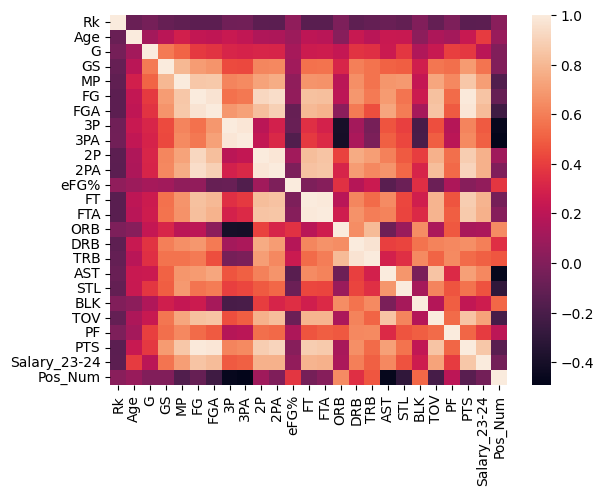

In [ ]:
ax = sns.heatmap(df.corr())
plt.show()

## Wykres zarobków zawodników NBA

In [ ]:
df5= df.sort_values('Salary_23-24')

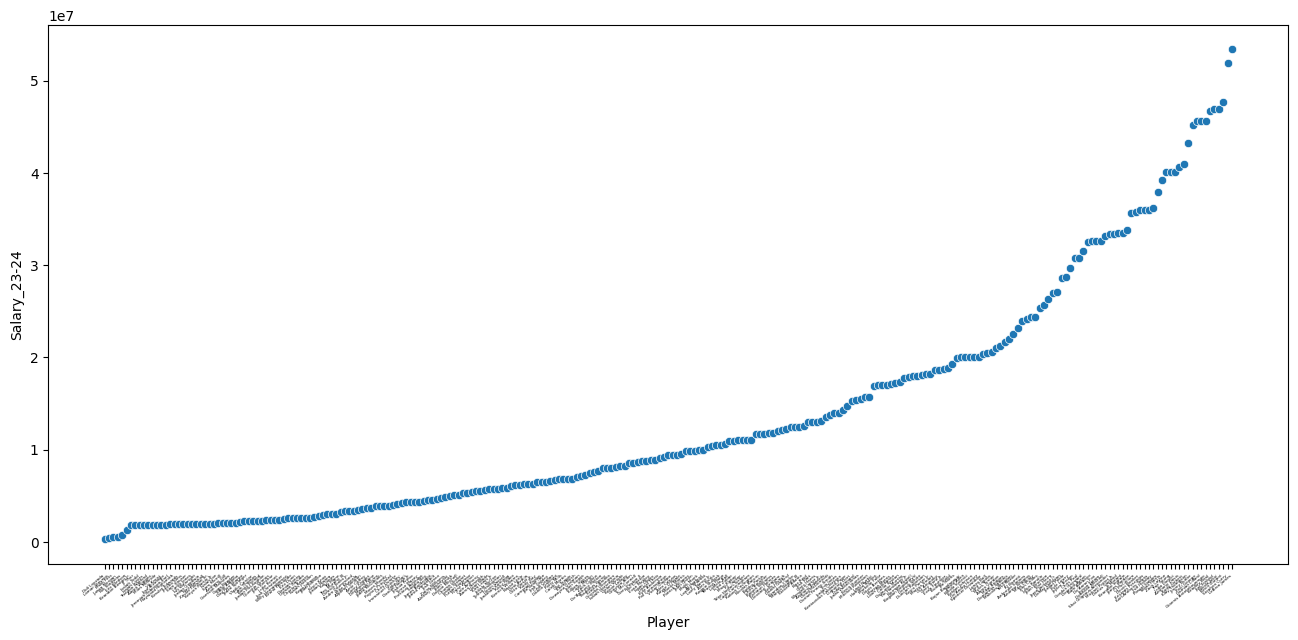

In [ ]:


plt.figure(figsize=(16,7))
sns.scatterplot(x=df5['Player'], y=df5['Salary_23-24'])
plt.xticks(rotation=40, horizontalalignment='right', fontsize=3)

print()

## Przygotowanie Data Frame do modeli predykcyjnych

In [ ]:
df_model = df.iloc[:,5:]
df_model

,G,GS,MP,FG,FGA,3P,3PA,2P,2PA,eFG%,...,TRB,AST,STL,BLK,TOV,PF,PTS,Salary_23-24,Pos_Num,Age_new
0,73,28,23.6,3.6,8.3,0.8,2.1,2.9,6.1,0.486,...,6.5,1.1,0.5,0.6,1.2,2.1,9.1,4379527,5,1
1,76,75,26.3,2.8,5.1,0.0,0.0,2.8,5.0,0.547,...,10.0,3.4,0.9,0.8,1.5,2.0,6.9,12600000,5,2
2,56,56,32.6,7.3,13.0,0.0,0.1,7.3,12.9,0.557,...,10.1,3.4,1.4,0.8,2.6,3.1,19.1,32600060,5,1
3,32,0,11.3,1.7,4.1,0.2,1.5,1.5,2.6,0.424,...,2.7,0.7,0.2,0.3,0.5,1.1,4.1,2194200,4,1
4,66,61,27.3,3.9,8.6,2.4,5.9,1.5,2.7,0.588,...,3.4,1.5,0.7,0.3,0.7,1.5,11.1,8500000,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,62,31,21.7,3.1,6.8,1.2,3.9,1.9,2.9,0.540,...,2.1,1.0,0.6,0.2,0.7,1.8,8.1,4810200,3,1
257,77,8,18.9,1.6,3.5,0.6,1.5,1.0,2.0,0.535,...,2.9,2.4,1.2,0.2,0.6,0.7,4.4,8195122,2,2
258,52,1,16.3,2.7,5.2,0.3,0.9,2.4,4.3,0.550,...,4.0,2.0,1.0,0.3,1.0,1.6,6.2,8000000,4,3
259,76,76,34.9,9.4,20.3,3.1,8.0,6.3,12.3,0.536,...,3.7,9.7,0.9,0.1,4.0,1.7,28.4,40064220,1,1


In [ ]:
y = df_model.pop('Salary_23-24')
X = df_model

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [ ]:
len(y_train)

208

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# data = [X_train, X_test, X_val]
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)


In [ ]:
len(X_train_scaled[1])

23

In [ ]:
# scaler.fit(X_test)
X_test_scaled = scaler.transform(X_test)
# scaler.fit(X_val)
X_val_scaled = scaler.transform(X_val)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import linear_model

In [ ]:
model_lasso = linear_model.Lasso(alpha=0.1)
model_lasso.fit(X_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.000e+15, tolerance: 3.137e+12
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.1)

In [ ]:
model_lasso.score(X_train_scaled,y_train)

0.8087238217467485

In [ ]:
y_pred = model_lasso.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mse

27292693372342.902

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

mean_absolute_percentage_error(y_test, y_pred)

0.7346354241424761

In [ ]:
from sklearn.linear_model import ElasticNet

# Tworzymy model regresji Elastic Net
elastic_net_model = ElasticNet(alpha=0.1, l1_ratio=0.5)

# Uczenie modelu na danych treningowych
elastic_net_model.fit(X_train_scaled, y_train)

ElasticNet(alpha=0.1)

In [ ]:
elastic_net_model.score(X_train_scaled,y_train)

0.8013287712193611

In [ ]:
elastic_net_model.score(X_test_scaled,y_test)

0.8294742454253836

In [ ]:
model_lasso.score(X_test_scaled,y_test)

0.8180289241682165

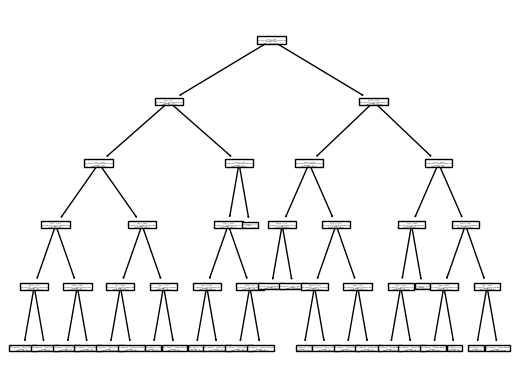

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

model_tree = DecisionTreeRegressor(max_depth=5, min_samples_split=3)
model_tree.fit(X_train_scaled,y_train)
tree.plot_tree(model_tree)
plt.savefig("tre")

In [ ]:
model_tree.score(X_test_scaled,y_test)

0.8150336672821515

In [ ]:
from sklearn.model_selection import GridSearchCV

decision = DecisionTreeRegressor()
parameters = {'max_depth':(3, 5, 8), 'min_samples_split':[1, 3, 5, 8, 10, 13, 16, 20]}
grid_model = GridSearchCV(decision, parameters)
grid_model.fit(X_train_scaled,y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _valid

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': (3, 5, 8),
                         'min_samples_split': [1, 3, 5, 8, 10, 13, 16, 20]})

In [ ]:
grid_model.best_params_

{'max_depth': 3, 'min_samples_split': 16}

In [ ]:
grid_model.cv_results_

{'mean_fit_time': array([0.00043516, 0.00194907, 0.00138793, 0.00139074, 0.00138292,
        0.00145726, 0.00136232, 0.00135803, 0.00040259, 0.00177841,
        0.00177417, 0.00175834, 0.00192075, 0.001788  , 0.00173683,
        0.00178437, 0.00036082, 0.00275846, 0.00274005, 0.00238786,
        0.00221667, 0.00207028, 0.00215673, 0.00206518]),
 'std_fit_time': array([1.30716399e-04, 8.28670478e-04, 1.67780289e-05, 2.33841837e-05,
        2.47462406e-05, 2.43515905e-04, 6.62091442e-05, 3.45567149e-05,
        1.31407064e-04, 2.47075280e-05, 7.83390774e-05, 7.12695307e-05,
        3.20186881e-04, 7.80663547e-05, 3.52402985e-05, 1.04479624e-04,
        3.32487852e-05, 5.07255424e-04, 4.32899749e-04, 3.09149773e-04,
        1.96828341e-04, 2.69573721e-05, 5.85753255e-05, 1.42875643e-04]),
 'mean_score_time': array([0.        , 0.00086999, 0.00051122, 0.00051169, 0.00049725,
        0.00053725, 0.0005053 , 0.00052276, 0.        , 0.00052176,
        0.00049477, 0.00049486, 0.00053654, 0.00

In [ ]:
grid_model.best_score_

0.7009857913271215

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

In [ ]:
model_neuro = tf.keras.Sequential()
model_neuro.add(layers.Dense(64, activation='relu', input_shape=(None, 23)))  # Warstwa wejściowa z 64 neuronami i funkcją aktywacji ReLU
# model_neuro.add(layers.Dense(128, activation='relu'))  # Warstwa ukryta z 128 neuronami i funkcją aktywacji ReLU
model_neuro.add(layers.Dense(1))

In [ ]:
model_neuro.compile(loss='mean_squared_error',  # Funkcja straty dla problemu regresji
              optimizer='adam',  # Optymalizator (algorytm aktualizacji wag)
              metrics=['mae'])  # Metryka, którą chcemy monitorować podczas trenowania (średni błąd bezwzględny)


In [ ]:
history = model_neuro.fit(X_train_scaled, y_train, epochs=100, batch_size=1024, validation_data=(X_val_scaled, y_val))


Epoch 1/100
1/1 [==============================] - 1s 860ms/step - loss: 328142950498304.0000 - mae: 13316292.0000 - val_loss: 462815139725312.0000 - val_mae: 16913710.0000
Epoch 2/100
1/1 [==============================] - 0s 48ms/step - loss: 328142950498304.0000 - mae: 13316292.0000 - val_loss: 462815139725312.0000 - val_mae: 16913710.0000
Epoch 3/100
1/1 [==============================] - 0s 46ms/step - loss: 328142950498304.0000 - mae: 13316293.0000 - val_loss: 462815139725312.0000 - val_mae: 16913710.0000
Epoch 4/100
1/1 [==============================] - 0s 52ms/step - loss: 328142950498304.0000 - mae: 13316292.0000 - val_loss: 462815139725312.0000 - val_mae: 16913710.0000
Epoch 5/100
1/1 [==============================] - 0s 66ms/step - loss: 328142950498304.0000 - mae: 13316292.0000 - val_loss: 462815139725312.0000 - val_mae: 16913710.0000
Epoch 6/100
1/1 [==============================] - 0s 65ms/step - loss: 328142916943872.0000 - mae: 13316293.0000 - val_loss: 4628151397253

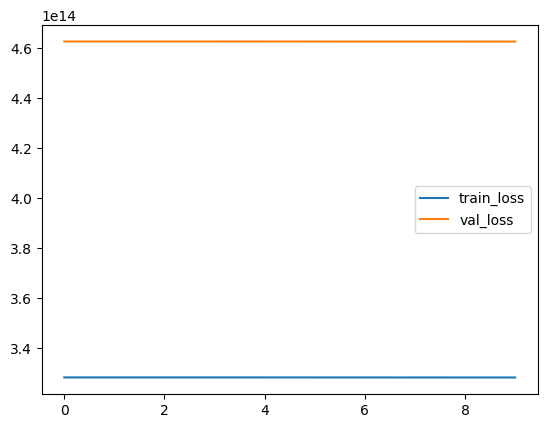

In [ ]:
plt.plot(history.history["loss"], label="train_loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()
plt.show()